In [1]:
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cmocean.cm as cmo
from matplotlib.patches import Polygon

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
savefig = True
figext = '.pdf'

def savefig(fignum, figext=figext, savefig=savefig):
    dec = 10 if np.isclose(fignum*10, round(fignum*10)) else 100
    figname = 'Fig%.2d_%.2d%s' % (fignum, round((fignum-floor(fignum))*dec), figext)
    if savefig:
        plt.savefig(figname)

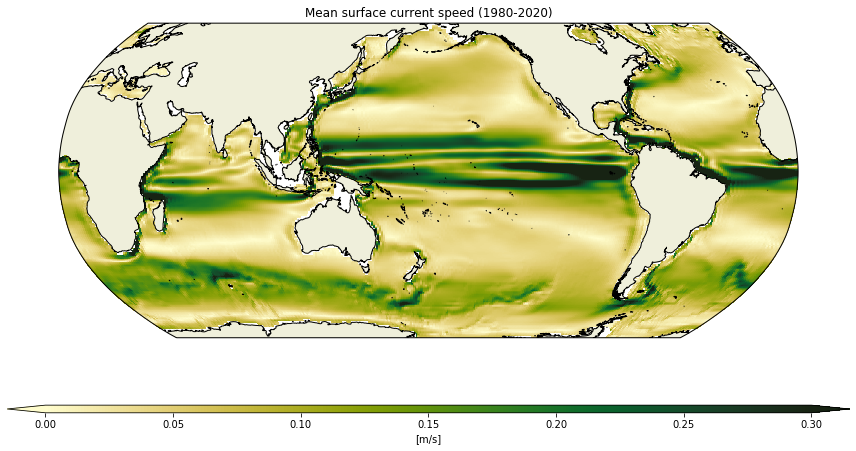

In [3]:
fignum = 4.2
U = xr.open_mfdataset('/Users/erik/Desktop/GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset('/Users/erik/Desktop/GODAS/vcur*', combine='by_coords')
spd = np.hypot(U.ucur.isel(level=0).mean('time'), V.vcur.isel(level=0).mean('time'))

projection = cartopy.crs.Robinson(central_longitude=180)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

a = spd.plot(cmap=cmo.speed, vmin=0, vmax=0.3, add_colorbar=False,
             transform=cartopy.crs.PlateCarree())
plt.title('Mean surface current speed (1980-2020)')
plt.colorbar(a, ax=ax, orientation="horizontal", aspect=100, extend='both', label='[m/s]')

plt.tight_layout()
savefig(fignum)

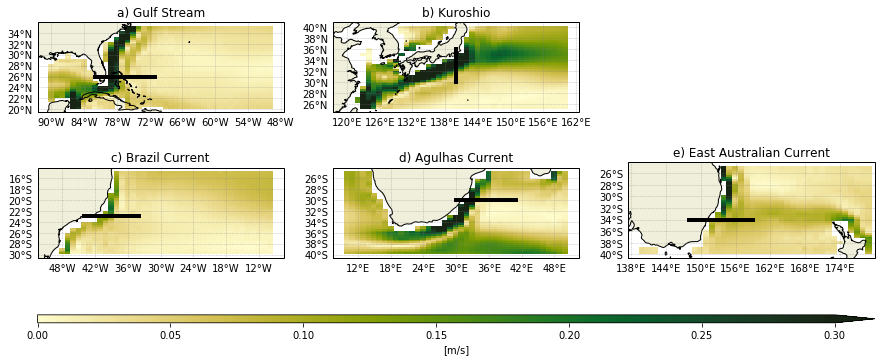

In [4]:
fignum = 4.3
U = xr.open_mfdataset('/Users/erik/Desktop/GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset('/Users/erik/Desktop/GODAS/vcur*', combine='by_coords')
spd = np.hypot(U.ucur.isel(level=0).mean('time'), V.vcur.isel(level=0).mean('time'))

projection = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(2, 3, subplot_kw={'projection': projection}, figsize=(15, 7))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(270, 310), slice(120, 160), slice(310, 350), slice(10, 50), slice(140,179)]
lats = [slice(20, 35), slice(25, 40), slice(-30, -15), slice(-40, -25), slice(-40, -25)]
section_lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
section_lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream', 'b) Kuroshio', 'c) Brazil Current', 'd) Agulhas Current', 'e) East Australian Current']
for i, ai in enumerate(ax.ravel()):
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    a = spd.sel(lon=lons[i], lat=lats[i]).plot(cmap=cmo.speed, vmin=0, vmax=0.3, transform=cartopy.crs.PlateCarree(), 
                                           ax=ai, add_colorbar=False)
    ai.set_title(titles[i])
    if isinstance(section_lons[i], slice):
        linelons, linelats = (section_lons[i].start, section_lons[i].stop), (section_lats[i], section_lats[i])
    else:
        linelons, linelats = (section_lons[i], section_lons[i]), (section_lats[i].start, section_lats[i].stop)
    ai.plot(linelons, linelats, 'k', linewidth=4, transform=cartopy.crs.PlateCarree())

    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='max', label='[m/s]')
plt.tight_layout()
savefig(fignum)

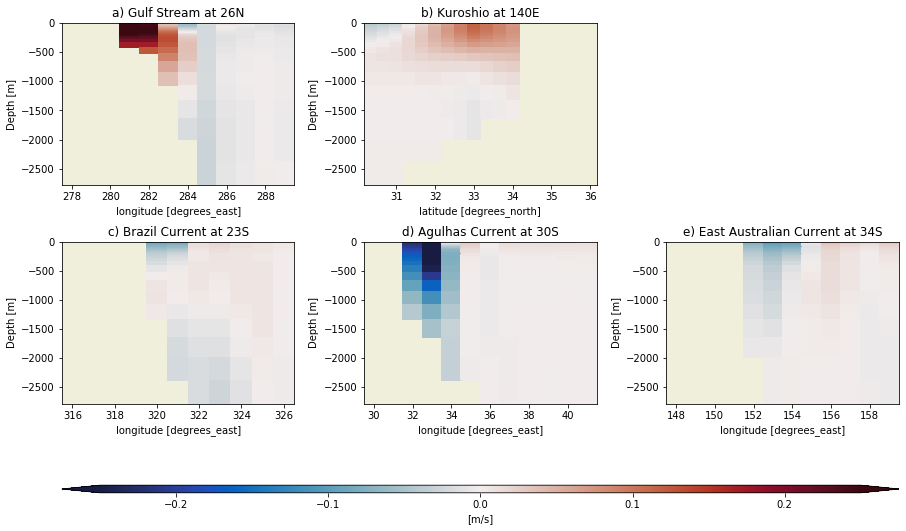

In [5]:
fignum = 4.4
U = xr.open_mfdataset('/Users/erik/Desktop/GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset('/Users/erik/Desktop/GODAS/vcur*', combine='by_coords')

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream at 26N', 'b) Kuroshio at 140E', 'c) Brazil Current at 23S', 'd) Agulhas Current at 30S', 'e) East Australian Current at 34S']
for i, ai in enumerate(ax.ravel()):
    if isinstance(lons[i], slice):
        vel = V.vcur.sel(lat=lats[i], method='nearest').sel(lon=lons[i], level=slice(0, 3000)).mean('time')
        vel = vel.assign_coords(level = (-vel.level))
    else:
        vel = V.vcur.sel(lon=lons[i], method='nearest').sel(lat=lats[i], level=slice(0, 3000)).mean('time')
        vel = vel.assign_coords(level = (-vel.level))
    a = vel.plot(cmap=cmo.balance, ax=ai, add_colorbar=False, vmin=-0.25, vmax=0.25)
    ai.set_title(titles[i])
    ai.set_ylabel('Depth [m]')
    ai.set_facecolor([0.9375 , 0.9375 , 0.859375])

plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[m/s]')
savefig(fignum)

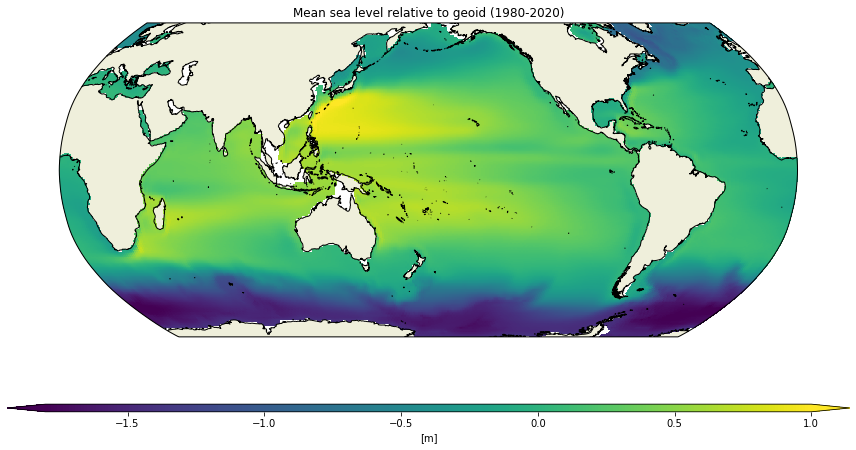

In [6]:
fignum = 4.5
SSH = xr.open_mfdataset('/Users/erik/Desktop/GODAS/ssh*', combine='by_coords')

projection = cartopy.crs.Robinson(central_longitude=180)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

a = SSH.sshg.mean('time').plot(cmap=cm.viridis, vmin=-1.8, vmax=1, add_colorbar=False, 
                               transform=cartopy.crs.PlateCarree())
plt.title('Mean sea level relative to geoid (1980-2020)')

cbar = plt.colorbar(a, ax=ax, orientation="horizontal", aspect=100, extend='both', label='[m]')
plt.tight_layout()
savefig(fignum)